In [1]:
import numpy as np
import pandas as pd
import os.path
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam


In [2]:
def load_path(path, part):
    """
    load X-ray dataset
    """
    dataset = []
    for folder in os.listdir(path):
        folder = path + '/' + str(folder)
        if os.path.isdir(folder):
            for body in os.listdir(folder):
                if body == part:
                    body_part = body
                    path_p = folder + '/' + str(body)
                    for id_p in os.listdir(path_p):
                        patient_id = id_p
                        path_id = path_p + '/' + str(id_p)
                        for lab in os.listdir(path_id):
                            if lab.split('_')[-1] == 'positive':
                                label = 'fractured'
                            elif lab.split('_')[-1] == 'negative':
                                label = 'normal'
                            path_l = path_id + '/' + str(lab)
                            for img in os.listdir(path_l):
                                img_path = path_l + '/' + str(img)
                                dataset.append(
                                    {
                                        'body_part': body_part,
                                        'patient_id': patient_id,
                                        'label': label,
                                        'image_path': img_path
                                    }
                                )
    return dataset

In [62]:
# part = "XR_ELBOW"
import matplotlib.pyplot as plt

def count_label(part):
    image_dir = "D://reaserch//data//MURA-v1.1//Dataset"
    data = load_path(image_dir, part)
    labels = []
    filepaths = []

    # add labels for dataframe for each category 0-fractured, 1- normal
    for row in data:
        labels.append(row['label'])
        filepaths.append(row['image_path'])

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')
    print(len(labels))
    plt.figure(figsize=(3, 3))
    categories = list(set(labels))
    plt.bar(categories, labels.value_counts())
    rate = round((labels.value_counts()[0]/labels.value_counts()[1]), 2)
    plt.title(part + ", rate = " + str(rate))
    plt.xlabel('category')
    plt.ylabel('count')
    plt.show()



5396


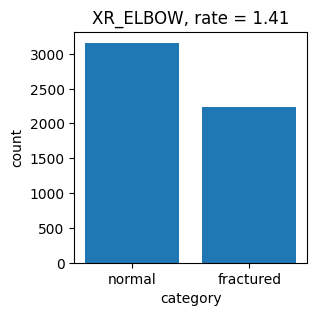

5567


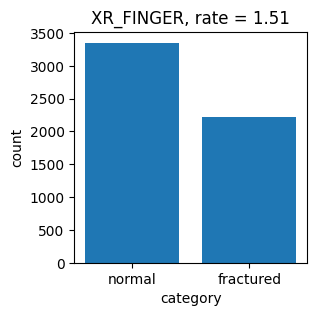

2126


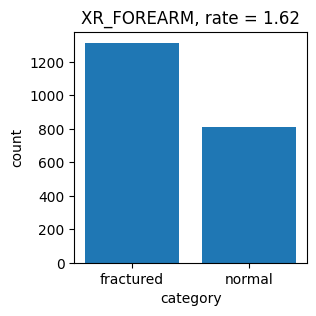

6003


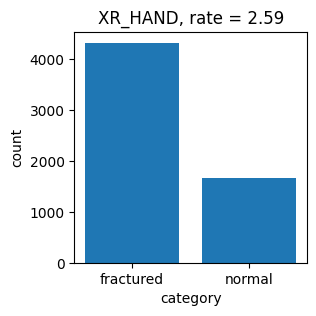

1560


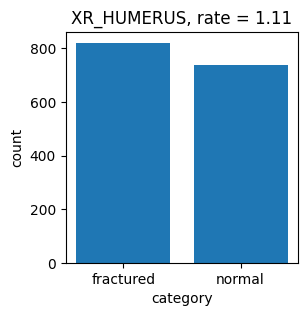

8942


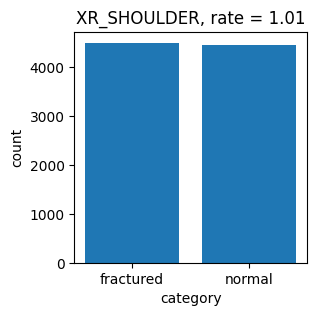

10411


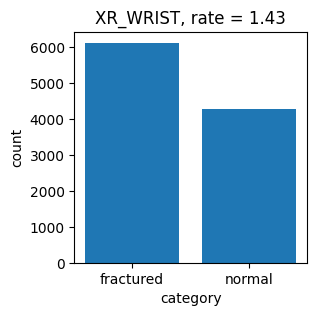

In [63]:
categories_parts = ["XR_ELBOW", "XR_FINGER", "XR_FOREARM", "XR_HAND", "XR_HUMERUS", "XR_SHOULDER", "XR_WRIST"]
for category in categories_parts:
    
    count_label(category)